In [1]:
from elasticsearch import Elasticsearch
from deepface import DeepFace
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import os
import time
import glob

In [2]:
es = Elasticsearch(hosts=['http://localhost:9200'], http_auth=('elastic', 'DkIed99SCb'))

In [3]:
model_name = 'ArcFace'
target_size = (160, 160)
embedding_size = 512

In [4]:
target_img_path = "dataset/targets/5.jpeg"
embedding_objs = DeepFace.represent(img_path = target_img_path, 
  model_name = model_name,
  detector_backend = 'retinaface'
)
target_embedding = embedding_objs[0]["embedding"]

In [5]:
query = {
    "size": 10,
    "query": {
    "script_score": {
        "query": {
            "match_all": {}
        },
        "script": {
            #"source": "cosineSimilarity(params.queryVector, 'title_vector') + 1.0",
            "source": "1 / (1 + l2norm(params.queryVector, 'title_vector'))", #euclidean distance
            "params": {
                "queryVector": list(target_embedding)
            }
        }
    }
}}

In [6]:
tic = time.time()
res = es.search(index="policedb2", body=query)
toc = time.time()

print(toc-tic," seconds")

0.4747292995452881  seconds


In [7]:
for i in res["hits"]["hits"]:
    candidate_name = i["_source"]["title_name"]
    candidate_score = i["_score"]
    print(candidate_name, candidate_score)


dataset/police/1808048.jpg 0.1957747
dataset/police/2102108.jpg 0.19241287
dataset/police/2102103.jpg 0.19205062
dataset/police/2104127.jpg 0.19172563
dataset/police/2104186.jpg 0.19127762
dataset/police/2212019.jpg 0.19063346
dataset/police/2204077.jpg 0.18967749
dataset/police/1805075.jpg 0.18965085
dataset/police/2210163.jpg 0.18900391
dataset/police/2206092.jpg 0.18808754


dataset/police/1808048.jpg 0.1957747


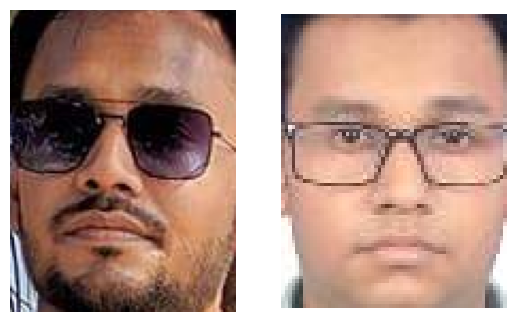

dataset/police/2102108.jpg 0.19241287


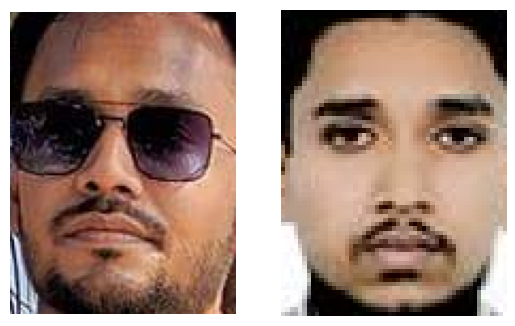

dataset/police/2102103.jpg 0.19205062


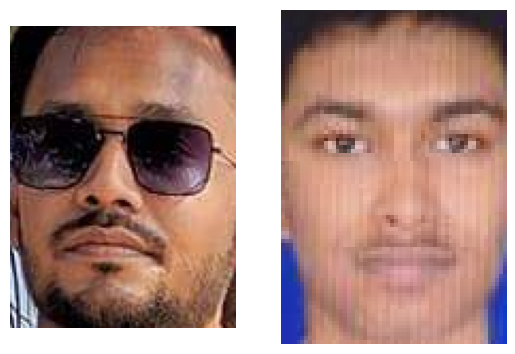

dataset/police/2104127.jpg 0.19172563


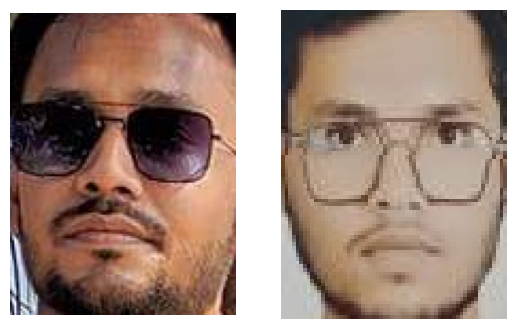

dataset/police/2104186.jpg 0.19127762


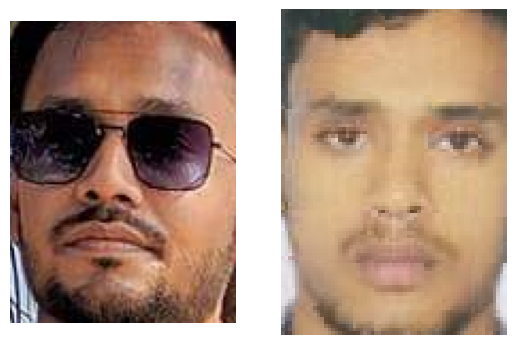

dataset/police/2212019.jpg 0.19063346


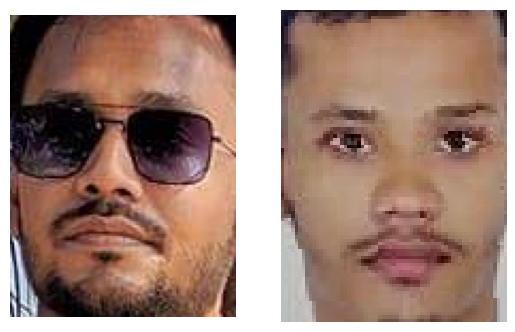

dataset/police/2204077.jpg 0.18967749


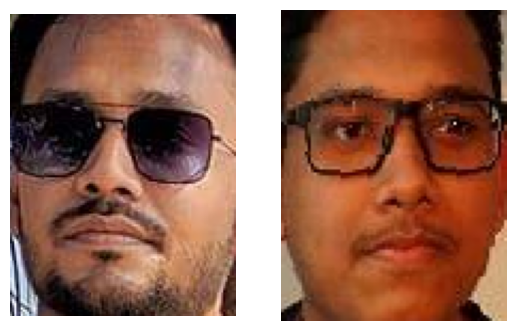

dataset/police/1805075.jpg 0.18965085


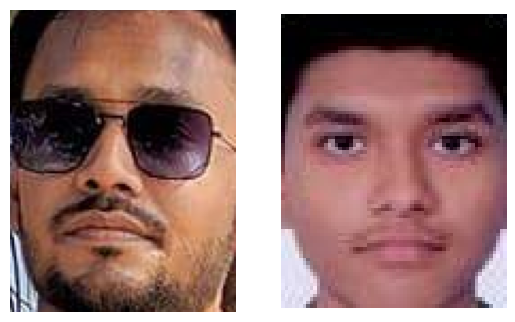

dataset/police/2210163.jpg 0.18900391


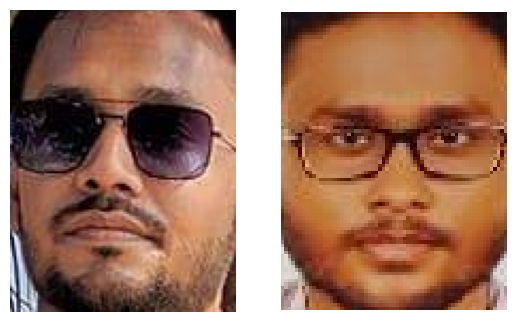

dataset/police/2206092.jpg 0.18808754


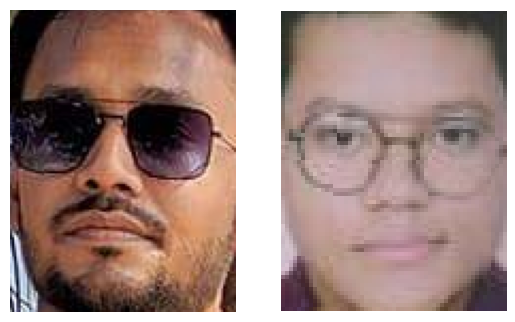

In [8]:
target_faces = RetinaFace.extract_faces(img_path = target_img_path, align = True)
target_img = target_faces[0]

for i in res["hits"]["hits"]:
    candidate_name = i["_source"]["title_name"]
    candidate_score = i["_score"]
    print(candidate_name, candidate_score)
    candidate_faces = RetinaFace.extract_faces(img_path = candidate_name, align = True)
    candidate_img = candidate_faces[0]

    fig = plt.figure()

    ax1 = fig.add_subplot(1, 2, 1)    
    plt.imshow(target_img)
    plt.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    plt.imshow(candidate_img)
    plt.axis('off')

    plt.show()